# Problem 1 (Python demo), 3 pts

* $\verb|.wav|$ file with starcraft sound saved in the git repository. Load it in python and play using the following functions:

In [4]:
from scipy.linalg import toeplitz
import numpy as np
import math
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib notebook

<IPython.core.display.Javascript object>


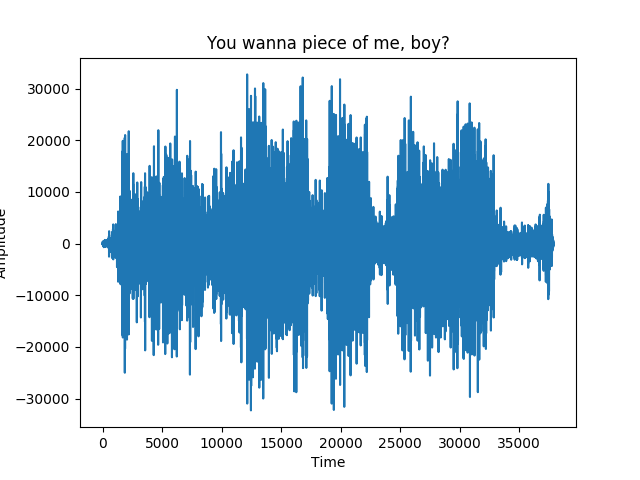

In [5]:
# reading
rate, audio = wav.read("data/TMaRdy00.wav")

# plotting
plt.plot(audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("You wanna piece of me, boy?")
plt.show()

# playing
Audio(audio, rate=rate)

Our next goal is to process this signal by multiplying it by a special type of matrix (convolution operation) that will smooth the signal. 
* Before processing this file let us estimate what size of matrix we can afford. Let $N$ be the size of the signal. Estimate analytically memory in megabytes required to store dense square matrix of size $N\times N$ to fit in your operation memory and print this number. Cut the signal so that you will not have swap (overflow of the operation memory). Note: Cut the signal by taking every p-th number in array: `signal[::p]`

In [6]:
memory_usage = audio.size**2 * 8 / 2**20 # assuming float64
print(memory_usage)

sampling = 2
reduced_audio = audio[::sampling]
N = reduced_audio.size
memory_usage = N**2 * 8 / 2**20 # assuming float64
print(memory_usage)

10952.0
2738.0


* Write a function 
```Python
def gen_toeplitz(N, alpha):    
    return T
```
that outputs matrix $T$: $$T_{ij} = \sqrt{\frac{\alpha}{\pi}}e^{-\alpha (i-j)^2}, \quad i,j=1,\dots,N$$ as numpy array. The function [np.meshgrid](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.meshgrid.html) will be helpful for this task. Note: matrices that depend only on difference of indices: $T_{ij} \equiv T_{i-j}$ are called Toeplitz. Toeplitz matrix-by-vector multiplication is convolution since it can be written as $$y_i = \sum_{j=1}^N T_{i-j} x_j.$$ Convolutions can be computed faster than $\mathcal{O}(N^2)$ complexity using Fast Fourier transform (will be covered later in our course, no need to implement it here).
Avoid using loops or lists! 

Note: matrices that depend only on difference of indices: $T_{ij} \equiv T_{i-j}$ are called Toeplitz. Toeplitz matrix-by-vector multiplication is called convolution.

In [17]:
# INPUT: N - integer (positive), alpha - float (positive)
# OUTPUT: T - np.array (shape: NxN)

def gen_toeplitz(N, alpha): # 5 pts
    numvec = np.arange(N,dtype=np.int32)
    Tij = np.sqrt(alpha/np.pi)*np.e**(-alpha*(numvec**2))
    T = toeplitz(Tij,Tij)
    return T

* Multiply matrix $T$ by your signal (for matvec operations use $\verb|numpy|$ package). Plot first $100$ points of the result and first $100$ points of your signal on the same figure. Do the same plots for $\alpha = \frac{1}{5}$, $\alpha = \frac{1}{100}$ using subplots in matplotlib. Make sure that you got results that look like slighly smoothed initial signal.

<IPython.core.display.Javascript object>


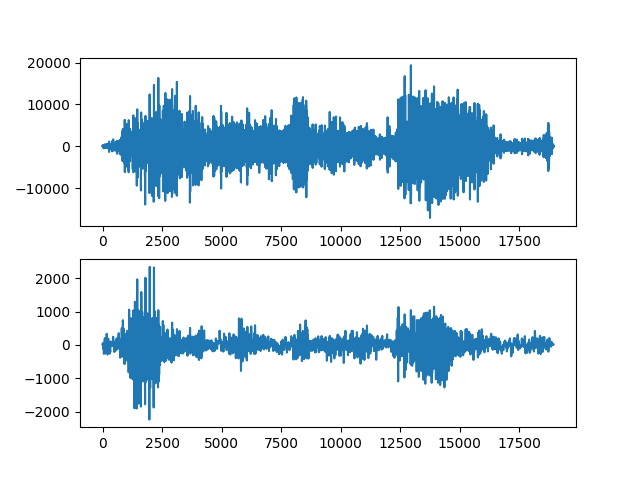

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1)

smoothed_audio_5 = np.matmul(reduced_audio, gen_toeplitz(N,1/5))
smoothed_audio_100 = np.matmul(reduced_audio, gen_toeplitz(N,1/100))


axes[0].plot(smoothed_audio_5) 
axes[1].plot(smoothed_audio_100) 

* Play the resulting signal. In order to do so format your array into $\verb|int16|$ before playing by using

`
your_array = your_array.astype(np.int16)
`

In [10]:
Audio(smoothed_audio_5.astype(np.int16), rate=rate/sampling)

* Measure times of multiplications by $T$ for different values of $N$ and plot them in loglog scale. What is the slope of this line? Why?

In [ ]:
N_range = arange(N)

# Problem 2 (Loops), 2 pts

Prove experimentally that python loops are evil.
Use all your imagination and zeros seminar as a reference.

# Problem 3 (Theoretical tasks)  2 pts

- Prove that $\| U A \|_F = \| A U \|_F = \| A \|_F$ for any unitary matrix $U$.
- Prove that $\| Ux \|_2 = \| x \|_2$ for any $x$ iff $U$ is unitary.

- $\| U A \|_F = \sqrt{trace(UA(UA)^T)} = \sqrt{trace(UAA^TU^T)} \stackrel{1}{=} \sqrt{trace(U^TUAA^T)} \stackrel{2}{=} \sqrt{trace(AA^T)}= \| A \|_F = \sqrt{trace(AA^T)} = \sqrt{trace(A^TA)} = \sqrt{trace(A^TAUU^T)} = \sqrt{trace(AUU^TA^T)} =\sqrt{trace(AU(AU)^T)} = \| A U \|_F $
    1. $ trace(AB) = trace(BA) $
    2. $ U^T = U^{-1} $
    
    
- $\| Ux \|_2 = \| x \|_2$ for any $x \iff U$ is unitary
    - $\Rightarrow$:
    - $\Leftarrow$:

# Exercise 4, 1pt
Write the loop printing odd integers in range $0\leq i \leq 10000$.

In [15]:
start = 0
stop = 10000
for i in range(start+1,stop,2):
    print(i)


1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
101
103
105
107
109
111
113
115
117
119
121
123
125
127
129
131
133
135
137
139
141
143
145
147
149
151
153
155
157
159
161
163
165
167
169
171
173
175
177
179
181
183
185
187
189
191
193
195
197
199
201
203
205
207
209
211
213
215
217
219
221
223
225
227
229
231
233
235
237
239
241
243
245
247
249
251
253
255
257
259
261
263
265
267
269
271
273
275
277
279
281
283
285
287
289
291
293
295
297
299
301
303
305
307
309
311
313
315
317
319
321
323
325
327
329
331
333
335
337
339
341
343
345
347
349
351
353
355
357
359
361
363
365
367
369
371
373
375
377
379
381
383
385
387
389
391
393
395
397
399
401
403
405
407
409
411
413
415
417
419
421
423
425
427
429
431
433
435
437
439
441
443
445
447
449
451
453
455
457
459
461
463
465
467
469
471
473
475
477
479
481
483
485
487
489
491
493
495
497
499
501
503
505
507
509
511
513
515
517
519
521
523
525
527

3929
3931
3933
3935
3937
3939
3941
3943
3945
3947
3949
3951
3953
3955
3957
3959
3961
3963
3965
3967
3969
3971
3973
3975
3977
3979
3981
3983
3985
3987
3989
3991
3993
3995
3997
3999
4001
4003
4005
4007
4009
4011
4013
4015
4017
4019
4021
4023
4025
4027
4029
4031
4033
4035
4037
4039
4041
4043
4045
4047
4049
4051
4053
4055
4057
4059
4061
4063
4065
4067
4069
4071
4073
4075
4077
4079
4081
4083
4085
4087
4089
4091
4093
4095
4097
4099
4101
4103
4105
4107
4109
4111
4113
4115
4117
4119
4121
4123
4125
4127
4129
4131
4133
4135
4137
4139
4141
4143
4145
4147
4149
4151
4153
4155
4157
4159
4161
4163
4165
4167
4169
4171
4173
4175
4177
4179
4181
4183
4185
4187
4189
4191
4193
4195
4197
4199
4201
4203
4205
4207
4209
4211
4213
4215
4217
4219
4221
4223
4225
4227
4229
4231
4233
4235
4237
4239
4241
4243
4245
4247
4249
4251
4253
4255
4257
4259
4261
4263
4265
4267
4269
4271
4273
4275
4277
4279
4281
4283
4285
4287
4289
4291
4293
4295
4297
4299
4301
4303
4305
4307
4309
4311
4313
4315
4317
4319
4321
4323
4325
4327


9153
9155
9157
9159
9161
9163
9165
9167
9169
9171
9173
9175
9177
9179
9181
9183
9185
9187
9189
9191
9193
9195
9197
9199
9201
9203
9205
9207
9209
9211
9213
9215
9217
9219
9221
9223
9225
9227
9229
9231
9233
9235
9237
9239
9241
9243
9245
9247
9249
9251
9253
9255
9257
9259
9261
9263
9265
9267
9269
9271
9273
9275
9277
9279
9281
9283
9285
9287
9289
9291
9293
9295
9297
9299
9301
9303
9305
9307
9309
9311
9313
9315
9317
9319
9321
9323
9325
9327
9329
9331
9333
9335
9337
9339
9341
9343
9345
9347
9349
9351
9353
9355
9357
9359
9361
9363
9365
9367
9369
9371
9373
9375
9377
9379
9381
9383
9385
9387
9389
9391
9393
9395
9397
9399
9401
9403
9405
9407
9409
9411
9413
9415
9417
9419
9421
9423
9425
9427
9429
9431
9433
9435
9437
9439
9441
9443
9445
9447
9449
9451
9453
9455
9457
9459
9461
9463
9465
9467
9469
9471
9473
9475
9477
9479
9481
9483
9485
9487
9489
9491
9493
9495
9497
9499
9501
9503
9505
9507
9509
9511
9513
9515
9517
9519
9521
9523
9525
9527
9529
9531
9533
9535
9537
9539
9541
9543
9545
9547
9549
9551


# Exercise 5, 1pt
* Write the function computing the $[x_0 + x_1, x_1 + x_2, ..., x_{n-1} + x_n]$

In [27]:
def neighbor_sum(X):
    Y = [sum(x) for x in zip(X,X[1:])]
    return Y

X = np.arange(101)
print(neighbor_sum(X))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199]


# Exercise 6, 1pt
* Write the function producing the inverse string

In [20]:
def reverse_string(St):
    return St[::-1]

St = "Test string"
print(reverse_string(St))

gnirts tseT
